## Preprocessing data in Scikit Learn Part 1

In [2]:
# Standardization
import numpy as np
import pandas as pd

In [10]:
# Generating normally distributed data
df = pd.DataFrame({
    'x': np.random.normal(0, 3, 10000),
    'y': np.random.normal(6, 4, 10000),
    'z': np.random.normal(-6, 6, 10000)
})  # Mean, Standard deviation, Total distribution of data
# np.random.normal(mean, std, size)

### General form
```python
np.random.normal(loc, scale, size)
```

- loc → the mean (μ) of the distribution
- scale → the standard deviation (σ)
- size → how many random values to generate

The result is a NumPy array of length size.

<Axes: ylabel='Density'>

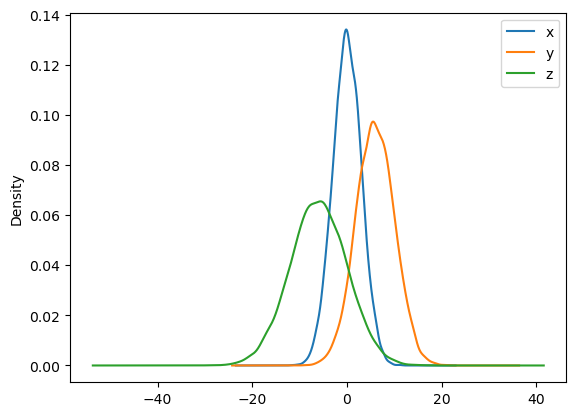

In [13]:
# Ploting data
df.plot.kde()

Next, use StandardScaler to keep the values of x, y, and z on the same scale. The x, y, and z
values are displayed on the same scale in the graph given below:

In [16]:
from sklearn.preprocessing import StandardScaler
standarscaler = StandardScaler()

<Axes: ylabel='Density'>

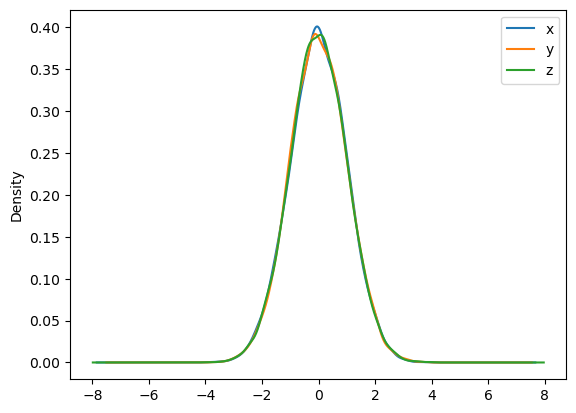

In [18]:
data_tf = standarscaler.fit_transform(df)
df = pd.DataFrame(data_tf, columns=['x', 'y', 'z'])
df.plot.kde()

## Preprocessing data in Scikit Learn Part 2

### MinMaxScaler: Example

Given below is a dataframe with x, y, and z columns created with a random function

In [25]:
df = pd.DataFrame({
    # positive skew
    'x': np.random.chisquare(8, 1000),

    # negative skew
    'y': np.random.beta(8, 2, 1000) * 40,

    # no skew
    'z': np.random.normal(50, 3, 1000)
})

<Axes: ylabel='Density'>

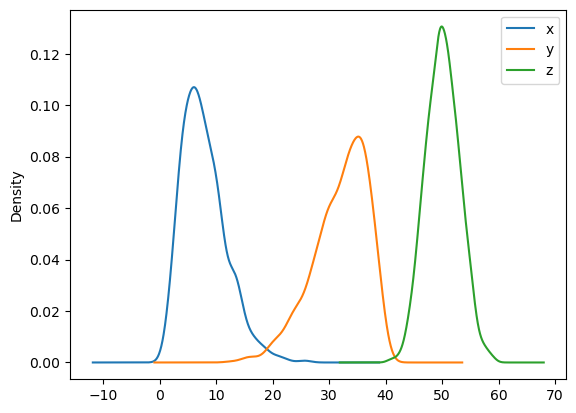

In [27]:
# next, visualize the plot to see if the data is normalized
df.plot.kde()

Let’s go column by column and explain **what distribution is used, why the skew looks the way it does, and what the parameters mean**.

---

## Overall idea

You’re creating a DataFrame with **three different types of distributions**:

| Column | Distribution  | Skew type             |
| ------ | ------------- | --------------------- |
| `x`    | Chi-square    | Positive (right) skew |
| `y`    | Beta (scaled) | Negative (left) skew  |
| `z`    | Normal        | No skew (symmetric)   |

Each column has **1000 values**.

---

## 1️⃣ `x: np.random.chisquare(8, 1000)` → **Positive skew**

### Chi-square distribution

```python
np.random.chisquare(df, size)
```

* **`df = 8`** → degrees of freedom
* **`size = 1000`** → number of samples

### Why it’s positively skewed

* Chi-square distributions are **always ≥ 0**
* They have a **long right tail**
* As degrees of freedom increase, the distribution becomes more symmetric (but still right-skewed)

### Interpretation

* Most values are **small**
* A few values are **very large**
* Typical use cases: variance estimation, hypothesis testing

So column **`x`** has:

* Many small values
* Few extreme high values → **right skew**

---

## 2️⃣ `y: np.random.beta(8, 2, 1000) * 40` → **Negative skew**

### Beta distribution

```python
np.random.beta(a, b, size)
```

* **`a = 8`**, **`b = 2`**
* Generates values **between 0 and 1**

### Shape of Beta(8, 2)

* When **a > b**, the distribution is **left-skewed (negative skew)**
* Values cluster near **1**
* Long tail toward **0**

### Why multiply by 40?

```python
np.random.beta(8, 2, 1000) * 40
```

* Scales the range from:

  * `[0, 1]` → `[0, 40]`
* Shape stays the same, only the scale changes

### Interpretation

* Most values are **high (close to 40)**
* Fewer low values → **left tail**
* Common in modeling **scores, proportions, bounded quantities**

---

## 3️⃣ `z: np.random.normal(50, 3, 1000)` → **No skew**

### Normal distribution

```python
np.random.normal(mean, std, size)
```

* **Mean = 50**
* **Standard deviation = 3**
* **1000 values**

### Why no skew?

* Normal distributions are **perfectly symmetric**
* Mean = median = mode

### Interpretation

* Most values fall between:

  * `47` and `53` (≈ 68%)
  * `44` and `56` (≈ 95%)

So column **`z`** is centered at 50 with a small spread and **no skew**.

---

## Summary table

| Column | Distribution | Parameters    | Shape        |
| ------ | ------------ | ------------- | ------------ |
| `x`    | Chi-square   | df = 8        | Right-skewed |
| `y`    | Beta × 40    | a = 8, b = 2  | Left-skewed  |
| `z`    | Normal       | μ = 50, σ = 3 | Symmetric    |

---

## Why this is useful

This setup is great for:

* Demonstrating **skewness**
* Testing **data tr you want, I can:

* Plot all three distributions
* Show skewness numerically
* Demonstrate how to “fix” skew with transformations


In [31]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
minmax = MinMaxScaler()

In [35]:
data_tf = minmax.fit_transform(df)

<Axes: ylabel='Density'>

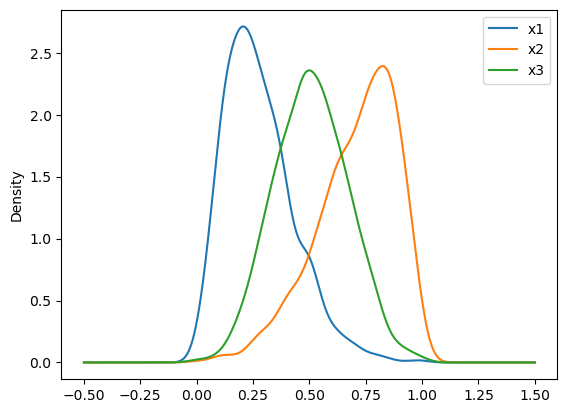

In [37]:
df = pd.DataFrame(data_tf, columns=['x1', 'x2', 'x3'])
df.plot.kde()

## Preprocessing Data in Scikit Learn Part 3

#### Imputation of Missing values

Algorithms cannot process missing values. imputers infer the value of missing data from existing data

In [41]:
import numpy as np

# import simpleImputer class from scikit-learn
from sklearn.impute import SimpleImputer

In [43]:
# SimpleImputer replaces the NaN value with mean values
imp_values = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_values.fit([[3, 5], [np.nan, 7], [1, 3]])
X = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp_values.transform(X))

[[2. 2.]
 [6. 5.]
 [7. 6.]]


#### Ordinal Encoding
It assigns each unique value to a different  variable.

In [46]:
data = pd.DataFrame({
    'Age': [12, 34, 56, 22, 24, 35],
    'Income': ['Low', 'Low', 'High', 'Medium', 'Medium', 'High']
})
data

,Age,Income
0,12,Low
1,34,Low
2,56,High
3,22,Medium
4,24,Medium
5,35,High


In [50]:
# This strategy assumes that the categories are ordered: 
# "Low"(1) < "Medium" (2) < "High" (3)
data.Income.map({'Low':1, 'Medium':2, 'High':3})

0    1
1    1
2    3
3    2
4    2
5    3
Name: Income, dtype: int64

#### One-Hot Encoding
This following example explains the concept of one-hot encoding

In [53]:
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder
from seaborn import load_dataset

In [55]:
# dataset is loaded into a pandas data frame data
data = load_dataset('penguins')

In [57]:
# Instantiate a OneHotEncoder object and assign it to ohe
ohe = OneHotEncoder()

In [59]:
# Fit and transform the data using the fit_transform() method
transform = ohe.fit_transform(data[['island']])

In [61]:
# It will return the array version of the transform data using the 
#.toarray() method
print(transform.toarray())

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [63]:
# Three columns are present in the array in the binary form because 
# there are three unique value in the Island column

In [65]:
# Print one hot encoded categories to know the 
# column labels using the .categories_attribute of 
# the encoder
print(ohe.categories_)

[array(['Biscoe', 'Dream', 'Torgersen'], dtype=object)]


In [67]:
# Add these columns as a separate column in the 
# Data frame
data[ohe.categories_[0]] = transform.toarray()
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Biscoe,Dream,Torgersen
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0.0,0.0,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0.0,0.0,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0.0,0.0,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,1.0,0.0,0.0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,1.0,0.0,0.0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,1.0,0.0,0.0
